### Модели классификации

#### Цель работы

Познакомиться с основными приемами работы с моделями классификации в scikit-learn.

#### Задания для выполнения

1. Загрузите [данные](https://www.kaggle.com/uciml/pima-indians-diabetes-database) о диагностике сахарного диабета.
3. Постройте модель классификации для предсказания наличия заболевания.
4. Оцените качество построенной модели с помощью отчета о классификации и матрицы классификации.
5. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

#### Методические указания

Для начала работы обратимся к набору данных diabetes. Это довольно известный датасет, собравший информацию о медицинских показателях более 700 пациентов, обследованных на предмет наличия сахарного диабета. На нем мы потренируемся строить классификационные модели. 

Сперва загрузим исходный набор данных.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


При проведении серьезного анализа перед построением модели машинного обучения нужно провести тщательную обработку и очистку набора данных: удаление пропущенных значений, анализ шкал, нормализация, удаление выбросов и аномалий. В учебных целях ограничимся обязательными проверками критических ошибок в данных.

В первую очередь проверим данные на наличие пропущенных значений:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Видим, что пропусков в данных нет. Кроме того, видно, что все данные выражены в численных шкалах. Значит, особенной обработки данный датасет не требует, он уже достаточно чистый. Теперь можно вывести основную статистику по датасету:


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Здесь мы видим шкалу измерения каждого признака. Можно придти к выводу, что явных видимых аномалий в данных нет. отдельно обратим внимание на столбец "Outcome" - он содержит целевую переменную.  В данном случае она также выражается числом (0 - здоров, 1 - болен), но это не всегда так.

Теперь выделим целевую переменную и факторы:

In [5]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

Выведем форму получившихся массивов:

In [6]:
y.shape, X.shape

((768,), (768, 8))

Данные выглядят полностью готовыми к началу машинного обучения. Для начала импортируем нужный класс и создадим его экземпляр:

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [8]:
logistic.fit(X, y)

C:\Users\k.musina\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Смысл этого сообщения в том, что процесс обучения завершился по условию достижения максимального количества итераций, а не по условию стабилизации функции ошибки. Это значит, что модель обучается трудно и медленно. Это может свидетельствовать о том, что результаты могут быть не очень удовлетворительными.

Но давайте посмотрим, что за модель мы получили после такого обучения. В первую очередь выведем коэффициенты модели:

In [9]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252341e-01  3.35998005e-02 -1.40873869e-02 -1.27049187e-03
 -1.24031910e-03  7.72023841e-02  1.41904163e+00  1.00354009e-02]


В линейных моделях коэффициенты имеют физический смысл: они показывают значимость соответствующих признаков. Поэтому представляет особый интерес посмотреть коэффициенты вместе с названиями признаков.

Для этого соединим массив названий колонок из датасета и массив коэффициентов. Можно использовать, например, генераторное выражение для прохода по получившемуся массиву. Конструкция "\_ = [ ... ]" нужна только в ноутбуке для того, чтобы подавить автоматический вывод выражения:

In [10]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234112009088
Glucose 0.03359980050526783
BloodPressure -0.014087386916373483
SkinThickness -0.0012704918724555183
Insulin -0.0012403190996257518
BMI 0.07720238405270298
DiabetesPedigreeFunction 1.4190416306931035
Age 0.010035400876607542


- Коэффициенты, меньшие нуля, будут с меньшей вероятностью (<0.5) указывать на важность признака при определении наличия диабета у рецепиента. Вероятности, меньшие 0.5:
    - ***кровяное давление*** - 49.65%.
- Положительные коэффициенты указывают на большую вероятность наличия болезни. Наибольшие вероятности: 
    - ***функция родословной диабета*** - 80.52%;
    - ***количество беременностей*** - 52.93%;
    - ***индекс массы тела*** - 51.93%%;
    - ***уровень глюкозы*** - 49.16%;
    - ***возраст*** - 50.25%.
- Коэффициенты, приближенные к нулю, указывают на важность признака с вероятностью, близкой к 50%:
    - ***инсулин*** - 49.97%;
    - ***толщина кожной складки трицепса*** - 49.97%.
    
Как и в модели линейной регрессии, данный вектор не включает в себя свободный коэффициент. Он хранится в отдельном поле класса:

In [11]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70291017]


Теперь можно построить по полученной модели прогноз. Для этого передадим в соответствующий метод нашу матрицу признаков. Сформировав вектор предсказанных значений целевой переменной можно сравнить его с реальными значениями:

In [12]:
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


Можно видеть, что большинство значений совпадает, но есть и ошибки - различия в значениях. Но так сравнивать все значения в ручном режиме очень не удобно. Поэтому лучше использовать специальные функции - метрики. Самая простая из них подсчитывает количество правильно и неправильно распознанных объектов и представляет результат в виде матрицы классификации:

In [13]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]], dtype=int64)

Матрица классификации показывает нам очень полезную информацию: совместное распределение числа объектов предсказанных и реальных классов. Рассматривая эту матрицу мы можем получить важную информацию: сколько объектов мы классифицировали правильно, сколько неверно, к каким классам наша модель тяготеет, какие классы распознаются хорошо, какие - плохо

Гораздо удобнее анализировать ту же информацию в графической форме. Для этого воспользуемся специальной библиотекой _seaborn_, которая позволяет создавать полезные для машинного обучения визуализации очень просто:

<Axes: >

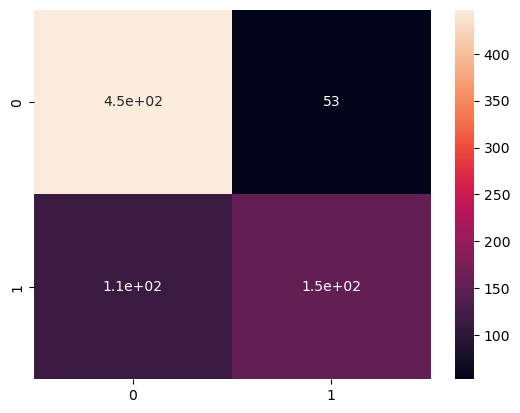

In [14]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Кроме матрицы классификации весьма полезно использовать численные метрики эффективности классификации. Самая простая и распространенная из них - метрика точности предсказания - показывает долю правильно распознанных объектов. Расчет этой метрики встроен в сам объект модели и доступен с помощью специального метода:

In [15]:
logistic.score(X, y)

0.7825520833333334

Эту же метрику можно рассчитать и по-другому - через отдельную функцию из пакета _metrics_. Обратите внимание на другую сигнатуру метода:

In [16]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

Значение метрики (0,78) показывает, что модель в среднем делает ошибки в 22% процентов случаев. Это основной показатель качества модели. В дальнейших работах мы покажем, как его замерять более правильно.

Если же такой уровень эффективности нас не устраивает, то мы можем попробовать использовать другие классы моделей классификации и среди них выбрать наиболее качественную. Например, можно попробовать построить полиномиальную модель. В библиотеке _sklearn_ не предусмотрено отдельного класса полиномиальной модели. Ее можно создать через специальный объект _PolynomialFeature_, который добавляет полиномиальные признаки к данным. Для его использования сначала импортируем его:


In [17]:
from sklearn.preprocessing import PolynomialFeatures

Теперь можно создать объект преобразования:

In [18]:
poly = PolynomialFeatures(2)

Здесь мы указываем, что будем создавать полиномиальные признаки второго порядка. Теперь можно использовать этот объект для создания собственно самих признаков:

In [19]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

Теперь эти данные можно использовать как исходные для моделирования. А строить мы будем обычную логистическую регрессию:

In [20]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

C:\Users\k.musina\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Сравним полученные значения с линейной регрессией.

In [21]:
print("Coefficients: \n", polynomial.coef_[0])

Coefficients: 
 [-7.27311816e-06 -6.64541814e-06 -4.51009348e-04 -2.29838428e-04
 -7.02224797e-05 -2.40607208e-04 -1.09639754e-04 -9.43761448e-07
 -1.12621161e-04  6.62969674e-05  4.68239639e-04  5.09587238e-04
  1.17116327e-04  9.57228737e-05  1.61654785e-04  7.54837952e-06
  8.12542668e-05  1.41287242e-04  2.49691479e-05  1.27588656e-06
 -4.71317078e-05  1.07770311e-04  6.92767640e-05 -5.54119124e-04
 -7.48462630e-04 -1.94648703e-04  6.68027430e-05  2.19051385e-04
  5.53475141e-05  1.09979994e-03  3.47145802e-05  2.02698560e-04
 -6.26572339e-05  3.39264808e-05  1.34939096e-04  3.64476497e-06
 -2.97625160e-04 -9.47933174e-05  1.25179684e-04  1.10405635e-04
  2.81851695e-05  7.08857926e-05  6.34262951e-07  2.14361214e-05
 -4.05541200e-04]


In [22]:
_ = [print(k, v) for k, v in zip(X.columns, polynomial.coef_[0])]

Pregnancies -7.273118163904557e-06
Glucose -6.64541814404486e-06
BloodPressure -0.0004510093477970159
SkinThickness -0.00022983842772564684
Insulin -7.02224796782666e-05
BMI -0.00024060720817091477
DiabetesPedigreeFunction -0.00010963975364648288
Age -9.437614484258402e-07


In [23]:
_ = [print(a, b) for a, b in list(zip(y, y_pred_poly))[:10]]

1 0
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [24]:
metrics.confusion_matrix(y, y_pred_poly)

array([[412,  88],
       [127, 141]], dtype=int64)

<Axes: >

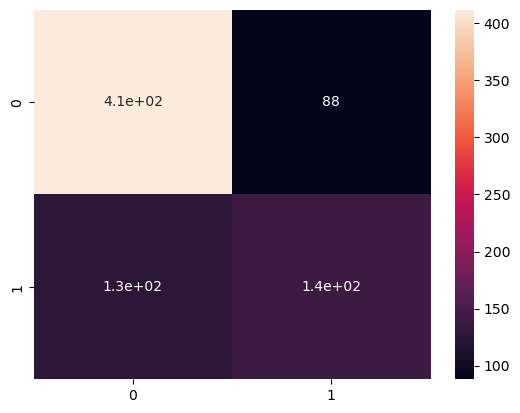

In [25]:
sns.heatmap(metrics.confusion_matrix(y, y_pred_poly), annot=True)

По матрице классификации видно, что объектов, предсказанных правильно, стало меньше. Таким образом, полиномиальная модель работает хуже линейной.

In [26]:
polynomial.score(poly, y)

0.7200520833333334

In [27]:
metrics.accuracy_score(y, y_pred_poly)

0.7200520833333334

Значение accuracy также стало меньше.

#### Дополнительные задания

1. Изучите документацию _sklearn_, посвященную классу [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.
1. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
    1. Метод опорных векторов
        1. Без ядра
        1. С линейным ядром
        1. С гауссовым ядром
        1. С полиномиальным ядром
    1. Метод ближайших соседей
    1. Многослойный перцептрон
    1. Дерево решений
    1. Наивный байесовский классификатор
    1. (\*) Другие методы:
        1. Пассивно-агрессивный классификатор
        1. Гребневый классификатор
        1. Случайный лес
        1. Беггинг
        1. Другие модели по желанию
1. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.
1. Повторите проведенный анализ для другой 
1. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

1. Дополнительная информация о модели:
- ***classes_*** - список меток классов, известных классификатору:

In [28]:
logistic.classes_, polynomial.classes_

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

- ***intercept_*** - свободный член классификатора:

In [29]:
logistic.intercept_, polynomial.intercept_

(array([-7.70291017]), array([-7.27311844e-06]))

- ***n_features_in_*** - количество признаков для обучения:

In [30]:
logistic.n_features_in_, polynomial.n_features_in_

(8, 45)

- ***n_iter_*** - фактическое количество итераций для каждого класса:

In [31]:
logistic.n_iter_, polynomial.n_iter_

(array([100]), array([100]))

Изменим количество аргументов при создании модели и посмотрим, к чему это приведет. 
Сначала отсортируем признаки по важности:

In [36]:
num = data.select_dtypes(include=np.number)
cols = num.columns[0:7].to_list()
cols.append('Outcome')
plt.figure(figsize=(9,9), dpi=100)
corr_m = data[cols].corr()
corr_m['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

<Figure size 900x900 with 0 Axes>

Возьмем 3, 6 и 8 признаков для дальнейшего обучения:

In [37]:
ft3 = corr_m['Outcome'].apply(lambda x: abs(x)).sort_values()[-4:-1].index.to_list()
ft6 = corr_m['Outcome'].apply(lambda x: abs(x)).sort_values()[-7:-1].index.to_list()
ft8 = corr_m['Outcome'].apply(lambda x: abs(x)).sort_values()[-9:-1].index.to_list()

ft3, ft6, ft8

(['Pregnancies', 'BMI', 'Glucose'],
 ['SkinThickness',
  'Insulin',
  'DiabetesPedigreeFunction',
  'Pregnancies',
  'BMI',
  'Glucose'],
 ['BloodPressure',
  'SkinThickness',
  'Insulin',
  'DiabetesPedigreeFunction',
  'Pregnancies',
  'BMI',
  'Glucose'])

Обучим новые модели на этих признаках:

In [38]:
data_tmp = data
X3 = data_tmp[ft3].fillna(-1).values
X6 = data_tmp[ft6].fillna(-1).values
X8 = data_tmp[ft8].fillna(-1).values

logistic_3 = LogisticRegression()
logistic_3.fit(X3, y)

logistic_6 = LogisticRegression()
logistic_6.fit(X6, y)

logistic_8 = LogisticRegression()
logistic_8.fit(X8, y)

C:\Users\k.musina\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
logistic_3.score(X3, y), logistic_6.score(X6, y), logistic_8.score(X8, y)

(0.7669270833333334, 0.77734375, 0.7747395833333334)

Обучение на меньшем количестве признаков дало худший результат (score на всех признаках равен ~0,78).

**Исследуем модель с методом опорных векторов**

Метод опорных векторов (Support Vector Machines — SVM) — это набор контролируемых методов обучения, используемых для классификации , регрессии и обнаружения выбросов.

Преимущества:
- Эффективен в пространствах больших размеров.
- По-прежнему эффективен в случаях, когда количество измерений превышает количество образцов.
- Использует подмножество обучающих точек в функции принятия решений (называемых опорными векторами), поэтому это также эффективно с точки зрения памяти.
- Универсальность: для функции принятия решения могут быть указаны различные функции ядра . Предоставляются общие ядра, но также можно указать собственные ядра.

К недостаткам опорных векторных машин можно отнести:
- Если количество функций намного превышает количество выборок, избегайте чрезмерной подгонки при выборе функций ядра, и термин регуляризации имеет решающее значение.
- SVM не предоставляют напрямую оценки вероятностей, они рассчитываются с использованием дорогостоящей пятикратной перекрестной проверки.
- Метод опорных векторов в scikit-learn поддерживают как плотные (numpy.ndarray и конвертируемые в это numpy.asarray), так и разреженные (любые scipy.sparse) выборочные векторы в качестве входных данных. Однако, чтобы использовать SVM для прогнозирования разреженных данных, он должен соответствовать этим данным. Для оптимальной производительности используйте C-порядковый numpy.ndarray (плотный) или scipy.sparse.csr_matrix (разреженный) с dtype=float64.

**Без ядра:**

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model_1 = SVC(kernel='linear')
model_1.fit(X, y)

y_pred = model_1.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_1.score(X, y)

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


0.77734375

In [41]:
from sklearn.svm import LinearSVC

model_2 = LinearSVC(dual='auto')
model_2.fit(X, y)

y_pred = model_2.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_2.score(X, y)

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


0.7799479166666666

In [42]:
model_3 = SVC(kernel='rbf')
model_3.fit(X, y)

y_pred = model_3.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_3.score(X, y)

1 1
0 0
1 1
0 0
1 0
0 0
1 0
0 0
1 1
1 0


0.7682291666666666

In [43]:
model_4 = SVC(kernel='poly')
model_4.fit(X, y)

y_pred = model_4.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_4.score(X, y)

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 0
1 1
1 0


0.7760416666666666

Метод опорных векторов показал лучшие значения с использованием линейного ядра. 

**Исследуем модель с методом ближайших соседей:**

Принцип, лежащий в основе методов ближайшего соседа, состоит в том, чтобы найти предопределенное количество обучающих выборок, ближайших по расстоянию к новой точке, и предсказать метку по ним. Количество выборок может быть заданной пользователем константой (обучение k-ближайшего соседа) или изменяться в зависимости от локальной плотности точек (обучение соседей на основе радиуса). Расстояние, как правило, может быть любой метрической мерой: стандартное евклидово расстояние является наиболее распространенным выбором. Соседи на основе методов известны как не-обобщающего машины методы обучения, так как они просто «вспомнить» все его подготовки данных.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
    
model_5 = KNeighborsClassifier(n_neighbors=3)
model_5.fit(X, y)

y_pred = model_5.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_5.score(X, y)

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


0.859375

Метод ближайших соседей показал лучшие результаты относительно логистической регрессии и метода опорных веторов.

**Многослойный перцептрон:**
Многослойный персептрон (MLP) — это алгоритм обучения с учителем, который изучает функцию, где m — количество измерений для ввода и o- количество размеров для вывода. Учитывая набор функций и цель, он может изучить аппроксиматор нелинейной функции для классификации или регрессии. Он отличается от логистической регрессии тем, что между входным и выходным слоями может быть один или несколько нелинейных слоев, называемых скрытыми слоями.

Преимущества многослойного перцептрона:
- Возможность изучать нелинейные модели.
- Возможность изучения моделей в режиме реального времени (онлайн-обучение) с использованием partial_fit.

К недостаткам многослойного персептрона (MLP) можно отнести:
- MLP со скрытыми слоями имеют невыпуклую функцию потерь, когда существует более одного локального минимума. Поэтому разные инициализации случайных весов могут привести к разной точности проверки.
- MLP требует настройки ряда гиперпараметров, таких как количество скрытых нейронов, слоев и итераций.
- MLP чувствителен к масштабированию функций.

In [45]:
from sklearn.neural_network import MLPClassifier

model_6 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=1000)
model_6.fit(X, y)

y_pred = model_6.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_6.score(X, y)

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


0.7838541666666666

**Исследуем модель с деревом решений:**

Деревья решений (DT) — это непараметрический контролируемый метод обучения, используемый для классификации и регрессии . Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной, изучая простые правила принятия решений, выведенные из характеристик данных. Дерево можно рассматривать как кусочно-постоянное приближение.

Некоторые преимущества деревьев решений:
- Просто понять и интерпретировать. Деревья можно визуализировать.
- Требуется небольшая подготовка данных. Другие методы часто требуют нормализации данных, создания фиктивных переменных и удаления пустых значений. Этот модуль не поддерживает отсутствующие значения.
- Стоимость использования дерева является логарифмической по количеству точек данных, используемых для обучения дерева.
- Может обрабатывать как числовые, так и категориальные данные. Однако реализация scikit-learn пока не поддерживает категориальные переменные. Другие методы обычно специализируются на анализе наборов данных, содержащих только один тип переменных.
- Способен обрабатывать проблемы с несколькими выходами.
- Использует модель белого ящика. Если данная ситуация наблюдаема в модели, объяснение условия легко объяснить с помощью булевой логики. Напротив, в модели черного ящика (например, в искусственной нейронной сети) результаты могут быть труднее интерпретировать.
- Возможна проверка модели с помощью статистических тестов. Это позволяет учитывать надежность модели.
- Работает хорошо, даже если его предположения несколько нарушаются истинной моделью, на основе которой были сгенерированы данные.

К недостаткам деревьев решений можно отнести:
- Обучающиеся дереву решений могут создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучением. Чтобы избежать этой проблемы, необходимы такие механизмы, как обрезка, установка минимального количества выборок, необходимых для конечного узла, или установка максимальной глубины дерева.
- Деревья решений могут быть нестабильными, поскольку небольшие изменения в данных могут привести к созданию совершенно другого дерева. Эта проблема смягчается за счет использования деревьев решений в ансамбле.
- Предсказания деревьев решений не являются ни гладкими, ни непрерывными, а являются кусочно-постоянными приближениями. Следовательно, они не годятся для экстраполяции.
- Известно, что проблема обучения оптимальному дереву решений является NP-полной с точки зрения нескольких аспектов оптимальности и даже для простых концепций. Следовательно, практические алгоритмы обучения дереву решений основаны на эвристических алгоритмах, таких как жадный алгоритм, в котором локально оптимальные решения принимаются в каждом узле. Такие алгоритмы не могут гарантировать возврат глобального оптимального дерева решений. Это можно смягчить путем обучения нескольких деревьев в учащемся ансамбля, где функции и образцы выбираются случайным образом с заменой.
- Существуют концепции, которые трудно изучить, поскольку деревья решений не выражают их легко, например проблемы XOR, четности или мультиплексора.
- Ученики дерева решений создают предвзятые деревья, если некоторые классы доминируют. Поэтому рекомендуется сбалансировать набор данных перед подгонкой к дереву решений.

In [70]:
from sklearn import tree

model_7 = tree.DecisionTreeClassifier()
model_7.fit(X, y)

y_pred = model_7.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_7.score(X, y)

1 1
0 0
1 1
0 0
1 1
0 0
1 1
0 0
1 1
1 1


1.0

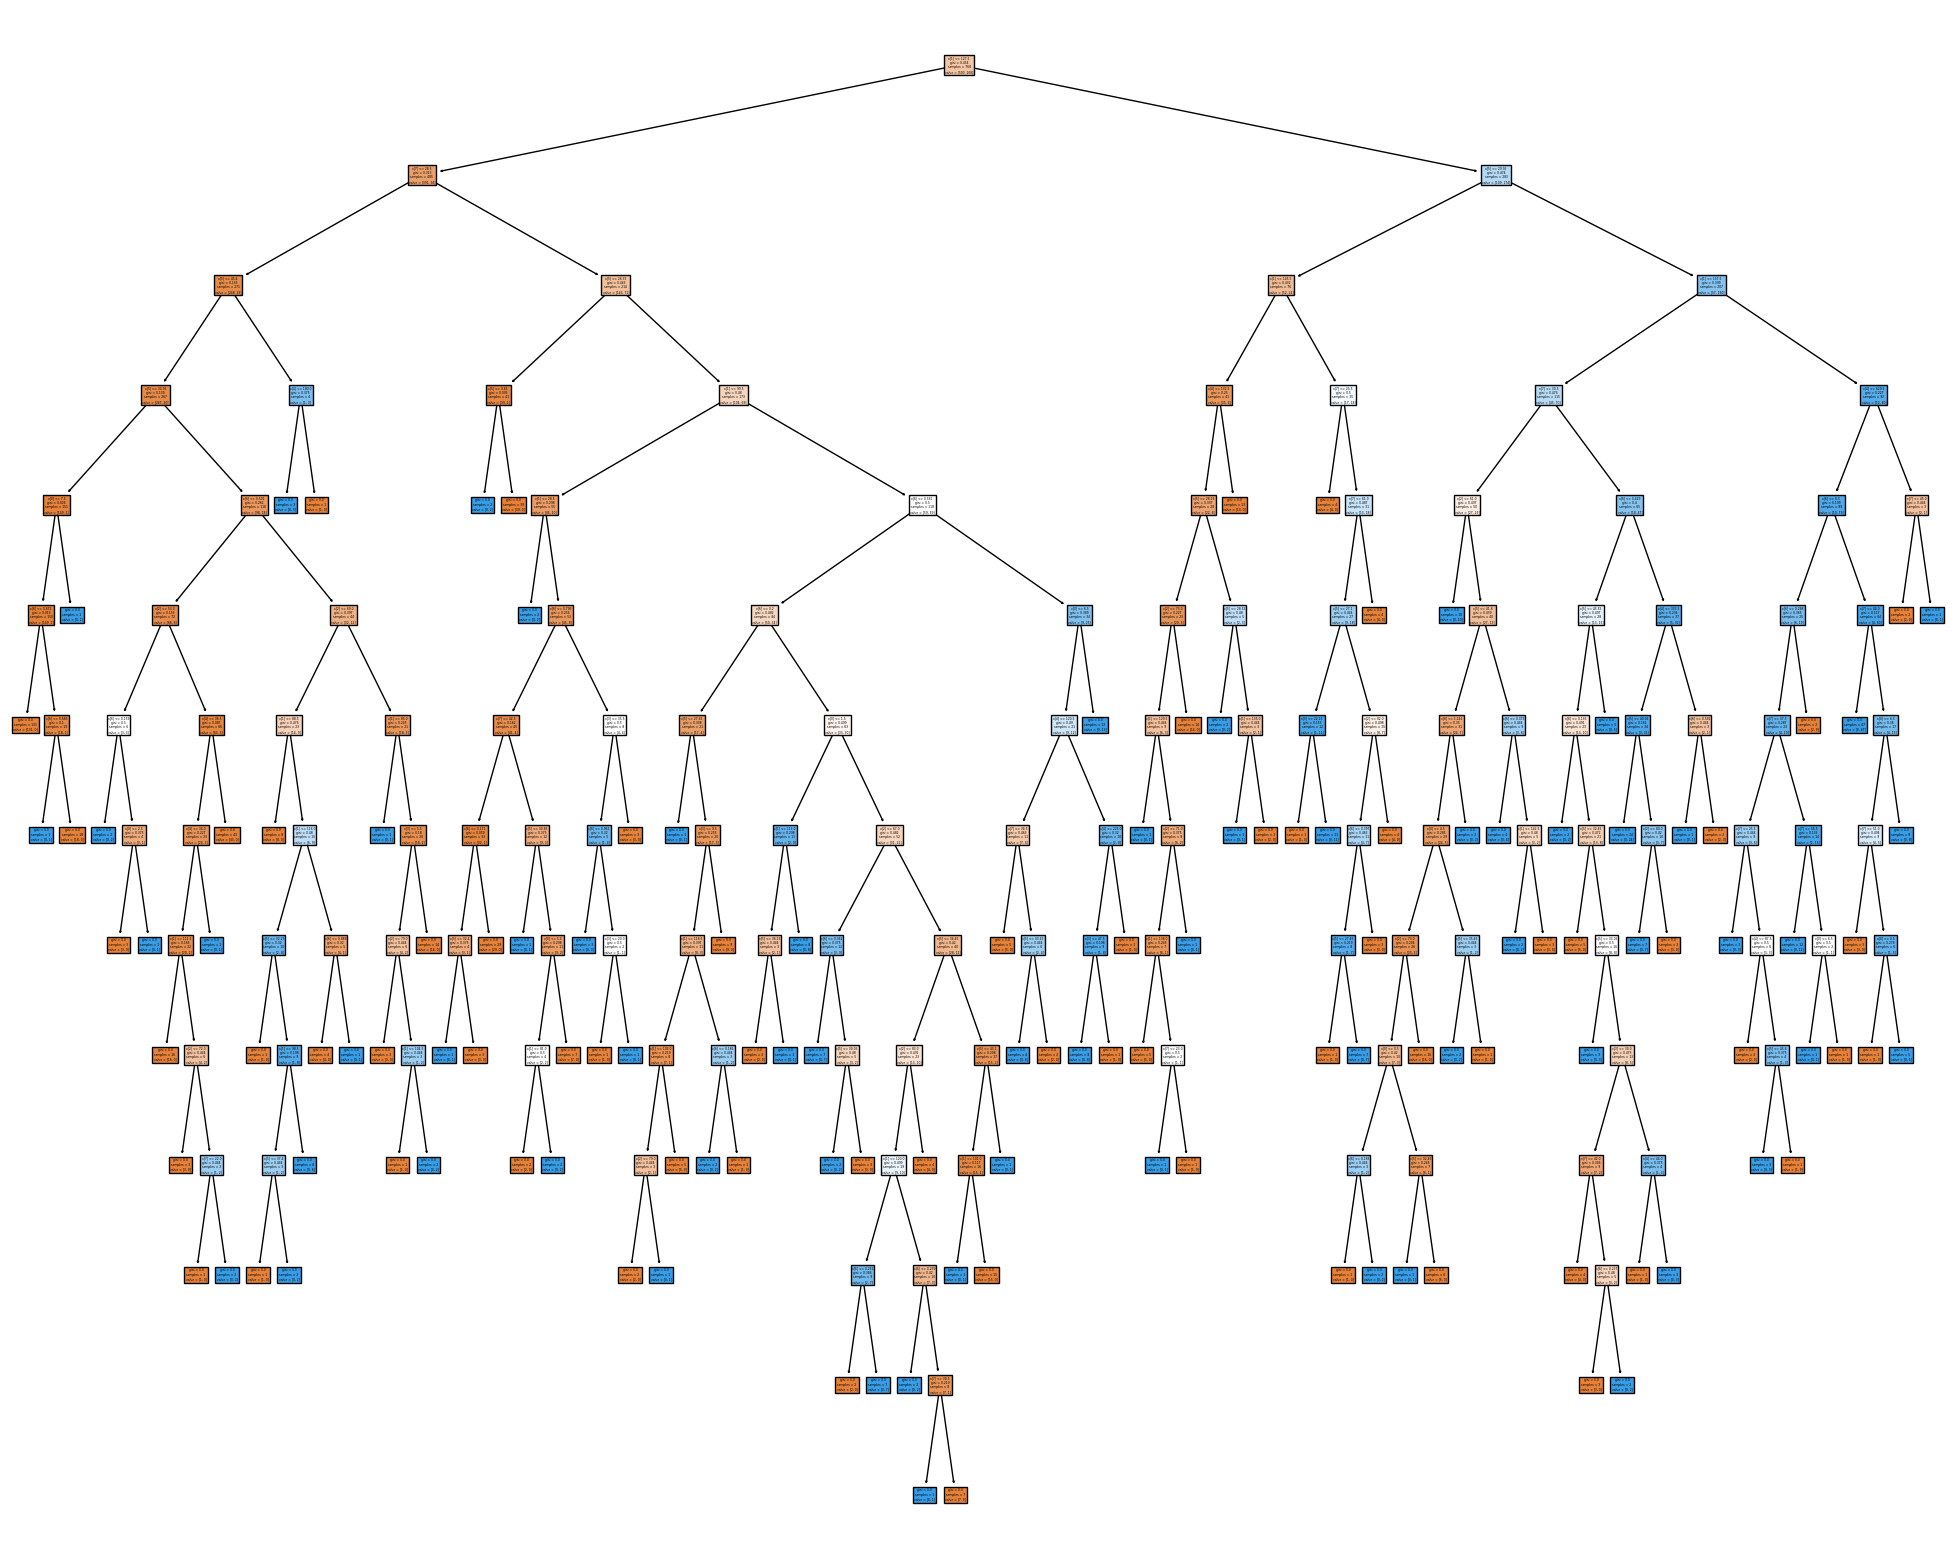

In [71]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_7, 
                   filled=True)

Дерево решений дало лучший результат на нашем наборе данных.

**Исследуем модель с наивным байесовским классификатором:**

Наивные методы Байеса — это набор алгоритмов контролируемого обучения, основанных на применении теоремы Байеса с «наивным» предположением об условной независимости между каждой парой характеристик при заданном значении переменной класса.

Несмотря на свои явно чрезмерно упрощенные предположения, наивные байесовские классификаторы довольно хорошо работают во многих реальных ситуациях, хорошо документируя классификацию и фильтрацию спама. Им требуется небольшой объем обучающих данных для оценки необходимых параметров. 

Наивные Байесовские ученики и классификаторы могут быть чрезвычайно быстрыми по сравнению с более сложными методами. Разделение условных распределений признаков классов означает, что каждое распределение может быть независимо оценено как одномерное распределение. Это, в свою очередь, помогает облегчить проблемы, возникающие из-за проклятия размерности.

С другой стороны, хотя наивный байесовский классификатор известен как приличный классификатор, он известен как плохой оценщик, поэтому к вероятностным выходным predict_proba данным не следует относиться слишком серьезно.

In [49]:
from sklearn.naive_bayes import GaussianNB

model_8 = GaussianNB()
model_8.fit(X, y)

y_pred = model_8.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_8.score(X, y)

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


0.7630208333333334

**Исследуем модель с пассивно-агрессивным классификатором:**

Пассивно-агрессивные алгоритмы — это семейство алгоритмов для крупномасштабного обучения. Они похожи на перцептрон в том, что не требуют скорости обучения. Однако, в отличие от перцептрона, они включают параметр регуляризации C.

In [50]:
from sklearn.linear_model import PassiveAggressiveClassifier

model_9 = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
model_9.fit(X, y)

y_pred = model_9.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_9.score(X, y)

1 1
0 1
1 1
0 0
1 0
0 1
1 0
0 1
1 0
1 1


0.515625

**Исследуем модель с гребневым классификатором:**

Регрессия гребня ядра (KRR) сочетает в себе регрессию и классификацию Риджа (линейный метод наименьших квадратов с регуляризацией по l2-норме) с уловкой ядра . Таким образом, он изучает линейную функцию в пространстве, индуцированную соответствующим ядром и данными. Для нелинейных ядер это соответствует нелинейной функции в исходном пространстве.

Форма модели, которую изучил, KernelRidge идентична форме поддержки векторной регрессии (SVR). Однако используются другие функции потерь: KRR использует квадратичную потерю ошибок, в то время как опорная векторная регрессия используетϵ-нечувствительные потери в сочетании с регуляризацией l2. В отличие от этого SVR, подгонка KernelRidge может выполняться в закрытой форме и обычно быстрее для наборов данных среднего размера. С другой стороны, изученная модель не является разреженной и, следовательно, медленнее, чем SVR.

In [51]:
from sklearn.kernel_ridge import KernelRidge

model_10 = KernelRidge(alpha=1.0)
model_10.fit(X, y)

y_pred = model_10.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_10.score(X, y)

1 0.5184408624481875
0 0.14431823817722034
1 0.7201461849326733
0 0.1628098549481365
1 0.7115465015376685
0 0.30407290809671395
1 0.26319346131640486
0 0.8220845239848131
1 0.5844353723805398
1 0.17551687636296265


0.21165946732937857

**Исследование модели с методом "Случайный лес":**

Случайный лес — это метаоценщик, который соответствует ряду классификаторов дерева решений для различных подвыборок набора данных и использует усреднение для повышения точности прогнозирования и контроля переподбора. Размер подвыборки контролируется параметром max_samples, если bootstrap=True (по умолчанию), в противном случае для построения каждого дерева используется весь набор данных.

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_11 = RandomForestClassifier(max_depth=2, random_state=0)
model_11.fit(X, y)

y_pred = model_11.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_11.score(X, y)

1 1
0 0
1 0
0 0
1 1
0 0
1 0
0 0
1 1
1 0


0.7565104166666666

**Исследуем модель "Бегинг":**

Классификатор Бэггинга — это ансамблевый метаоценщик, который подбирает каждый базовый классификатор к случайным подмножествам исходного набора данных, а затем объединяет их отдельные прогнозы (путем голосования или усреднения) для формирования окончательного прогноза. Такую метаоценку обычно можно использовать как способ уменьшить дисперсию оценки черного ящика (например, дерева решений) путем введения рандомизации в процедуру ее построения и последующего создания из нее ансамбля.

In [53]:
from sklearn.ensemble import BaggingClassifier

model_12 = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)
model_12.fit(X, y)

y_pred = model_12.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

model_12.score(X, y)

1 1
0 0
1 1
0 0
1 0
0 0
1 0
0 0
1 1
1 0


0.7708333333333334

Выведем значение ошибки на разных тестовых выборках для каждой модели:

training SVC no kernel
training SVC linear kernel
training SVC rbf kernel
training SVC poly kernel
training KNeighborsl
training MLP


C:\Users\k.musina\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\k.musina\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\k.musina\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs fa

training TreeDecision
training NaiveBayes
training PassiveAgressive
training RidgeClassificator
training RandonForest
training Bagging


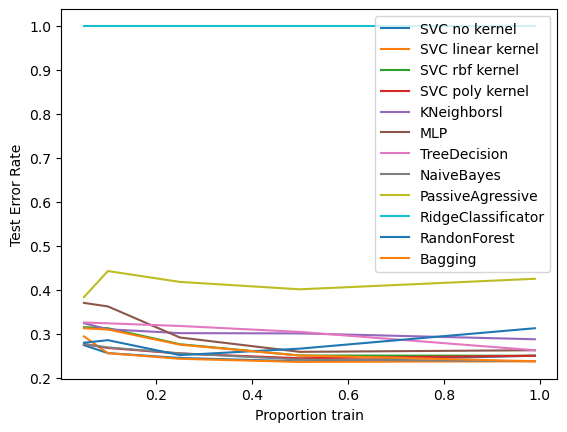

In [55]:
from sklearn.model_selection import train_test_split

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 10

classifiers = [
    ("SVC no kernel", SVC(kernel='linear')),
    ("SVC linear kernel", LinearSVC(dual='auto')),
    ("SVC rbf kernel", SVC(kernel='rbf')),
    ("SVC poly kernel", SVC(kernel='poly')),
    ("KNeighborsl", KNeighborsClassifier(n_neighbors=3)),
    ("MLP", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=1000)),
    ("TreeDecision", tree.DecisionTreeClassifier()),
    ("NaiveBayes", GaussianNB()),
    ("PassiveAgressive", PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)),
    ("RidgeClassificator", KernelRidge(alpha=1.0)),
    ("RandonForest", RandomForestClassifier(max_depth=2, random_state=0)),
    ("Bagging", BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)),
]

xx = 1.0 - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=i, random_state=rng
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

Напишем одну функцию для вывода оценки точности для всех моделей сразу:

In [66]:
def print_score(X, y):
    for name, clf in classifiers:
        print("training %s" % name)
        clf.fit(X, y)
        y_pred = clf.predict(X)
        print(clf.score(X, y))

In [67]:
print_score(X, y)

training SVC no kernel
0.77734375
training SVC linear kernel
0.7799479166666666
training SVC rbf kernel
0.7682291666666666
training SVC poly kernel
0.7760416666666666
training KNeighborsl
0.859375
training MLP
0.7838541666666666
training TreeDecision
1.0
training NaiveBayes
0.7630208333333334
training PassiveAgressive
0.515625
training RidgeClassificator
0.21165946732937857
training RandonForest
0.7565104166666666
training Bagging
0.7708333333333334


Повторим полностью анализ для задачи распознавания вида ириса по параметрам растения.

In [68]:
from sklearn import datasets

iris = datasets.load_iris()
print("Feature names:")
print(iris.feature_names)
print("Data(X):")
print(iris.data[:3])
print("Target names:[0   1   2]")
print(iris.target_names)
print("Target(y):")
print(iris.target)

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data(X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Target names:[0   1   2]
['setosa' 'versicolor' 'virginica']
Target(y):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [69]:
X_iris = iris.data
y_iris = iris.target

print_score(X_iris, y_iris)

training SVC no kernel
0.9933333333333333
training SVC linear kernel
0.9666666666666667
training SVC rbf kernel
0.9733333333333334
training SVC poly kernel
0.9733333333333334
training KNeighborsl
0.96
training MLP
0.9866666666666667
training TreeDecision
1.0
training NaiveBayes
0.96
training PassiveAgressive
0.96
training RidgeClassificator
0.9297187361318368
training RandonForest
0.9666666666666667
training Bagging
0.9666666666666667


#### Контрольные вопросы

1.  **Чем отличается применение разных моделей классификации в библиотеке _sklearn_?**
    
    Разные модели классификации в библиотеке scikit-learn предназначены для решения задач классификации (разделение данных на категории) и могут различаться в методах, основных концепциях и типах данных, которые они могут обрабатывать. Например:
   - Логистическая регрессия - линейная модель, используемая для бинарной или многоклассовой классификации.
   - Метод опорных векторов (SVM):
        1. Без ядра: Используется, когда данные линейно разделимы. Подходит для задач с линейно разделимыми классами, но может не справляться с более сложными данными.
        2. С линейным ядром: Подходит для линейно разделимых данных, но может быть расширен на нелинейные случаи с использованием преобразования данных.
        3. С гауссовым ядром (RBF): Позволяет обрабатывать нелинейные данные и строить сложные границы решений. Чувствителен к гиперпараметру ширины гауссова ядра.
        4. С полиномиальным ядром: Подходит для данных, где границы решений имеют полиномиальную форму, такие как задачи с кривыми разделениями.
    - Метод ближайших соседей (k-NN) - используется для задач классификации и регрессии. Основная идея - объект присваивается классу, который наиболее часто встречается среди k ближайших соседей. Параметры включают k (количество соседей) и метрику расстояния (например, евклидово расстояние).
    - Многослойный перцептрон - используется для задач классификации и регрессии. Это нейронная сеть с несколькими скрытыми слоями. Он способен моделировать сложные нелинейные зависимости, но может потребовать больше данных и обучения.
    - Дерево решений - применяется для классификации и регрессии. Построение дерева основано на разбиении данных на подмножества с использованием признаков. Подходит для задач с категориальными и числовыми признаками.
    - Наивный байесовский классификатор - эффективен в задачах классификации текста и многих других задачах. Основан на вероятностной модели. Предполагает независимость признаков, что может быть неверно для некоторых данных.
    - Пассивно-агрессивный классификатор - вариант метода опорных векторов, который стремится минимизировать ошибки классификации и максимизировать ширину разделяющей гиперплоскости.
    - Гребневый классификатор (Ridge Classifier) - использует L2-регуляризацию для улучшения обобщения. Подходит для данных с мультиколлинеарностью.
    - Случайный лес - эффективен для задач классификации и регрессии. Строит ансамбль решающих деревьев и устойчив к переобучению.
    - Беггинг - используется для уменьшения дисперсии и повышения стабильности модели. Может применяться с разными базовыми классификаторами.

   Выбор модели зависит от конкретной задачи и характеристик данных. 

2. **Что показывает метрика точности регрессии?**
    
   Метрика точности регрессии показывает, насколько хорошо регрессионная модель соответствует данным. Значение метрики, близкое к 1 указывает на то, что модель хорошо объясняет вариацию в данных, а близкое к 0 - что модель плохо соответствует данным.<br>
<br>

3. **Какое значение имеют коэффициенты логистической регрессии?**

    Коэффициенты логистической регрессии представляют собой веса, присваиваемые признакам в модели. Эти коэффициенты показывают, как каждый признак влияет на вероятность принадлежности к определенному классу.<br>
<br>

4. **Что показывает матрица классификации?**

    Матрица классификации (или матрица ошибок) показывает, сколько объектов было правильно классифицировано, а сколько неправильно. Она позволяет оценить производительность классификационной модели.<br>
<br>

5. **Какие параметры имеет конструктор объекта логистической регрессии?**

    Конструктор объекта логистической регрессии включает параметры, такие как:
   - penalty - тип регуляризации (L1, L2 или ничего).
   - C - обратная сила регуляризации (меньшее значение увеличивает регуляризацию).
   - solver - метод решения (например, 'liblinear' для малых датасетов и 'lbfgs' для больших).
   - max_iter - максимальное количество итераций для оптимизации.<br>
<br>

6. **Какие атрибуты имеет объект логистической регрессии?**

    Атрибуты объекта логистической регрессии включают:
   - coef_ - коэффициенты (веса) признаков.
   - intercept_ - коэффициент пересечения (смещение). <br>
<br>

7. **Какие параметры и атрибуты имеют объекты других моделей машинного обучения библиотеки _sklearn_?**

    Параметры и атрибуты моделей машинного обучения в scikit-learn могут варьироваться в зависимости от типа модели, но часто включают в себя параметры для настройки модели (например, гиперпараметры), атрибуты для получения информации о модели (например, коэффициенты) и методы для обучения и предсказания (например, fit() и `predict()`). Эти параметры и атрибуты различаются в зависимости от выбранной модели, поэтому для конкретной модели стоит обратиться к документации scikit-learn для получения подробной информации.